# Computer Vision - Pantalla verde (solución)

En este ejercicio aprenderemos a trabjar con imágenes utilizando la [librería OpenCV](http://opencv.org/). El mismo está divido en las siguientes partes:
1. **Pantalla verde**
2. Transformaciones geométricas
3. Filtros
4. Bordes
5. Hough
6. Detección de esquinas

## Resumen
En esta primera parte del ejercicio nos aseguraremos de tener instalada la librería y reemplazaremos el fondo verde de una imagen por otro elegido por nosotros. 

Seguiremos los siguientes pasos:
1. Instalación
2. Cargar imagen
3. Máscaras
4. Reemplazar fondo

## 1 - Instalación
Ejecutaremos lo siguiente para instalar la librería necesaria. Seleccionar la instalación por conda o brew en función del ambiente con el que se está trabajando.

In [1]:
%%bash
#conda install opencv3
#brew install opencv

Validemos que la instalación haya sido correcta.

In [2]:
import cv2
print (cv2.__version__)

3.2.0


## 2- Cargar imagen
Para cargar la imagen primero importaremos las librerías necesarias. Luego haremos uso de la función imread de OpenCV. 

[Leer sobre su uso aquí.](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html) Luego aplicarla para cargar la imagen ubicada en photos/obama.jpg.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [4]:
### SOLUCIÓN
image = cv2.imread("photos/obama.jpg")

La imagen correctamente cargada debe ser del tipo numpy.ndarray ya que no es más que una matriz para la computadora.

In [5]:
print(type(image))

<class 'numpy.ndarray'>


Verifiquemos el tamaño de nuestra imagen.

In [6]:
image.shape

(720, 1280, 3)

** ¿Qué significa el 3 en la forma de la imagen?**

** Respuesta: ** Cada pixel de la imagen está representado por tres valores: el rojo, azul y el verde.

OpenCV lee las imágenes en BGR y no en RGB. Veamos la imagen cargada.

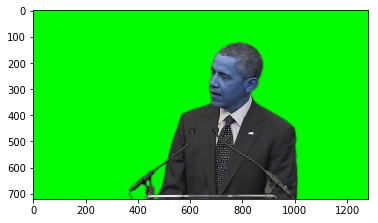

In [7]:
plt.imshow(image)

Para solucionar esto aplicaremos una transformación en los colores.

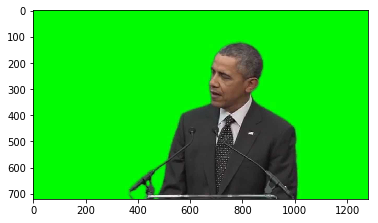

In [8]:
#Copio imagen para no destruirla
image_copy = np.copy(image)
#La leo en RGB y no en BGR
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

## 3 - Máscaras
Puedo aplicar una máscara que me permita quedarme con únicamente los pixeles que cumplan determinadas condiciones. En particular usaremos la función [inRange](https://docs.opencv.org/3.0-beta/modules/core/doc/operations_on_arrays.html?highlight=inrange#cv2.inRange) que nos permitirá detectar los pixeles cuyos valores de R, G y B estén dentro de un rango que definiremos.

Definir los umbrales a continuación de forma de eliminar la parte verde de la imagen.

In [9]:
### SOLUCIÓN
#Defino los límites de los colores que voy a sustituir en RGB
lower = np.array([0,180,0])
upper = np.array([40,255,40])
#Esto significa que tolero todos los pixes que sean mayoritariamente verdes, aunque pueden tener algo de azul y rojo.
#El rojo y azul puede estar entre 0 y 40 y el verde entre 180 y 255

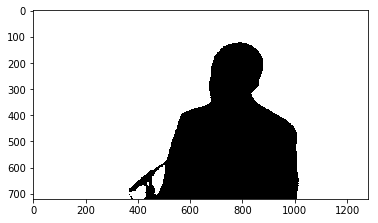

In [10]:
#Visualizo la máscara creada
mask = cv2.inRange(image_copy,lower,upper)
plt.imshow(mask,cmap='gray')

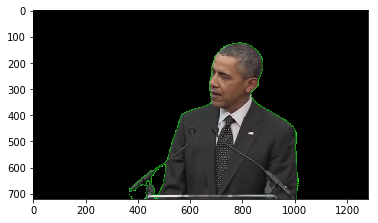

In [11]:
#Aplico la máscara creada
#Trabajo con una imagen nueva para no destruir la original
masked_image = np.copy(image_copy)
#Sobreescribo con negro cada pixel que es distinto de negro en la máscara
masked_image[mask!=0] = [0,0,0]
#Visualizo la nueva imagen
plt.imshow(masked_image)

Se puede repetir el proceso con distintos valores para los umbrales para eliminar más o menos verde según se crea necesario.

A continuación veamos el fondo que utilizaremos.

In [13]:
background_image = cv2.imread("photos/background.jpg")
background_image = cv2.cvtColor(background_image,cv2.COLOR_BGR2RGB)
background_image.shape

(853, 1280, 3)

El fondo tiene un tamaño distinto a la imagen original por lo que debemos eliminar el sobrante.

In [14]:
#Corto la imagen para que tenga el mismo tamaño
crop_background = background_image[0:image.shape[0],0:image.shape[1]]

Aplicar la máscara para eliminar del fondo la porción que ocupará nuestra foto original.

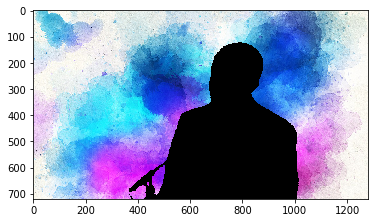

In [15]:
### SOLUCIÓN
#Aplico máscara opuesta
crop_background[mask==0] = [0,0,0]
plt.imshow(crop_background)

## 4 - Reemplazar fondo

Como un pixel negro se representa con un 0, si sumo las dos matrices o imágenes ya queda la imagen superpuesta.

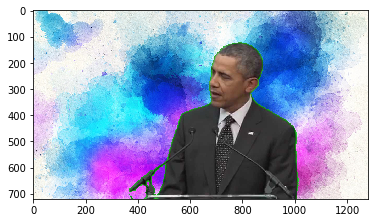

In [16]:
# Como el negro es un 0, sumo las dos matrices o imágenes y queda la imagen superpuesta
complete_image = crop_background + masked_image
plt.imshow(complete_image)